In [ ]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from urllib.error import HTTPError

## Filter/Parse the Data 

In [2]:
def extract_column(dataset, attr, *, pattern=''):
    """
    Returns a list samples of an attribute and
    constrained by some regular expression.
    
    Positional Arguments:
    dataset -- a csv file
    attr -- an attribute of the dataset 
    
    Keyword Arguments (Required):
    regex: the key used to filter specific datapoints (defaults to all)
    """
    df = pd.read_csv(dataset)[attr].squeeze()
    df.replace('/', '-', regex=True, inplace=True)
    return [dp[0] for dp in df.str.findall(fr'^{pattern}.*') if len(dp)]

## Download (Collect/Join), Save, and Load the Data

In [3]:
repos = (r'https://www.batteryarchive.org/data/' + _ + r'_timeseries.csv'
         for _ in extract_column('metadata.csv', 'cell_id', pattern='SNL'))

def load_battery_data(path):
    """
    Downloads the battery data, encoded as a pickle object (*.pkl)
    into the datasets directory.
    
    Data source -- @www.batteryarchive.org
    """
    
    try:
        os.chdir(path)
        data_path = r'Input/battery.pkl'
        if not Path('Input/').is_dir():
            Path("Input").mkdir(parents=True, exist_ok=True)
        if not Path(data_path).is_file():
            df = pd.concat([pd.read_csv(url) for url in repos])
            df.to_pickle(data_path)
            print("Download Complete!")
        return pd.read_pickle(data_path)
    except HTTPError:
        print("Download Failed!")

In [71]:
nils_path = r"C:\Users\heimb\Documents\GitHub\483_ML_BatteryLife"
jason_path = r"...\483_ML_BatteryLife"
#battery = load_battery_data(nils_path)  # change path to Github repository

# Look at the Data

In [11]:
%%time
battery = pd.read_pickle(nils_path+r"\Input\battery.pkl")

Wall time: 33.6 s


In [10]:
battery.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23888882 entries, 0 to 80104
Data columns (total 11 columns):
 #   Column                       Non-Null Count     Dtype  
---  ------                       --------------     -----  
 0   Date_Time                    23888882 non-null  object 
 1   Test_Time (s)                23888882 non-null  float64
 2   Cycle_Index                  23888882 non-null  float64
 3   Current (A)                  23888882 non-null  float64
 4   Voltage (V)                  23888882 non-null  float64
 5   Charge_Capacity (Ah)         23888882 non-null  float64
 6   Discharge_Capacity (Ah)      23888882 non-null  float64
 7   Charge_Energy (Wh)           23888882 non-null  float64
 8   Discharge_Energy (Wh)        23888882 non-null  float64
 9   Environment_Temperature (C)  23365199 non-null  float64
 10  Cell_Temperature (C)         23365199 non-null  float64
dtypes: float64(10), object(1)
memory usage: 2.1+ GB


In [12]:
battery.head()

,Date_Time,Test_Time (s),Cycle_Index,Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Environment_Temperature (C),Cell_Temperature (C)
0,2018-02-01 10:02:10.002962,10.002,1.0,0.0,2.940,0.0,0.0,0.0,0.0,15.163,15.375
1,2018-02-01 10:02:20.016433,20.016,1.0,0.0,2.941,0.0,0.0,0.0,0.0,15.148,15.437
2,2018-02-01 10:02:30.031429,30.031,1.0,0.0,2.941,0.0,0.0,0.0,0.0,15.087,15.375
3,2018-02-01 10:02:40.046426,40.046,1.0,0.0,2.941,0.0,0.0,0.0,0.0,15.240,15.375
4,2018-02-01 10:02:50.061462,50.061,1.0,0.0,2.941,0.0,0.0,0.0,0.0,15.087,15.375


In [12]:
battery.describe()

,Test_Time (s),Cycle_Index,Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Environment_Temperature (C),Cell_Temperature (C)
count,2.388888e+07,2.388888e+07,2.388888e+07,2.388888e+07,2.388888e+07,2.388888e+07,2.388888e+07,2.388888e+07,2.336520e+07,2.336520e+07
mean,1.613473e+07,2.841530e+03,-1.981644e-01,3.446082e+00,9.805721e-01,3.515892e-01,3.558338e+00,1.218359e+00,2.491242e+01,2.591522e+01
std,1.366815e+07,3.178384e+03,1.398625e+00,3.230248e-01,1.092508e+00,7.203539e-01,3.933567e+00,2.461379e+00,4.940035e+00,4.842974e+00
min,2.100000e-02,1.000000e+00,-9.998000e+00,-4.646000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.234700e+01,5.605000e+00
25%,4.554111e+06,5.210000e+02,-1.499000e+00,3.280000e+00,4.500000e-01,0.000000e+00,1.525000e+00,0.000000e+00,2.443900e+01,2.447900e+01
50%,1.292059e+07,1.853000e+03,1.000000e-03,3.386000e+00,6.410000e-01,0.000000e+00,2.260000e+00,0.000000e+00,2.475900e+01,2.503300e+01
75%,2.519087e+07,3.684000e+03,5.490000e-01,3.614000e+00,1.036000e+00,4.400000e-01,3.503000e+00,1.513000e+00,2.505700e+01,2.637400e+01
max,6.618272e+07,1.917500e+04,9.999000e+00,9.983000e+00,1.927600e+01,9.735000e+00,6.382100e+01,3.149800e+01,3.729300e+01,5.536100e+01


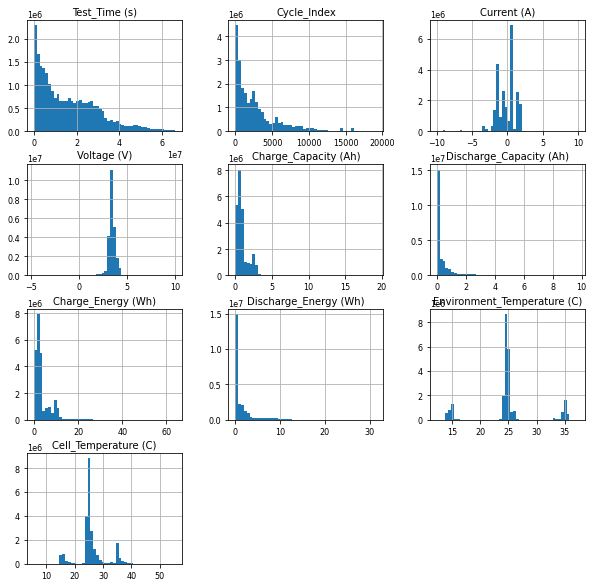

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

battery.hist(bins=50, figsize=(10, 10))
plt.show()

In [13]:
from data_visualization import insights_of_df

insights_of_df(battery)

ModuleNotFoundError: No module named 'data_visualization'

In [61]:
small_battery = battery.groupby(battery["Cycle_Index"]).mean()

In [72]:
small_battery.to_pickle(nils_path+"\Output\small_battery.pkl")

In [74]:
small_battery = pd.read_pickle(nils_path+"\Output\small_battery.pkl")
small_battery.head()

,Test_Time (s),Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Environment_Temperature (C),Cell_Temperature (C)
Cycle_Index,,,,,,,,,
1.0,7934.390433,-0.097194,3.496759,1.671898,0.647405,6.278663,2.343179,25.008416,26.500751
2.0,23676.607595,-0.062176,3.484337,1.699177,0.630862,6.334384,2.283184,25.031460,26.527933
3.0,39528.513582,-0.064466,3.485332,1.699607,0.632667,6.337541,2.291588,25.048526,26.524585
4.0,56647.632293,-0.029947,3.618597,2.475763,1.171745,9.361761,4.036673,25.331654,28.402862
5.0,75399.874005,-0.036432,3.566395,1.454018,0.414557,5.421763,1.464777,25.295968,27.839274


In [62]:
small_battery.describe()

,Test_Time (s),Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Environment_Temperature (C),Cell_Temperature (C)
count,1.917500e+04,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000
mean,3.066868e+07,-0.310247,3.379044,0.408434,0.143121,1.468028,0.492227,24.824320,25.245554
std,1.167348e+07,0.337714,0.082780,0.342212,0.127923,1.268894,0.455077,0.633798,0.889468
min,7.934390e+03,-0.997238,2.682210,0.000000,0.000000,0.000000,0.000000,15.346057,15.518314
25%,2.540319e+07,-0.627955,3.298308,0.085692,0.029692,0.287269,0.097308,24.664371,24.768410
50%,2.956835e+07,-0.155833,3.368514,0.458573,0.167645,1.662050,0.562804,24.841617,24.996417
75%,3.571093e+07,-0.002231,3.446318,0.516880,0.193618,1.866243,0.668108,25.081297,25.658197
max,5.764031e+07,0.131182,4.056593,9.819423,5.226918,32.527234,16.916578,32.671198,34.845374


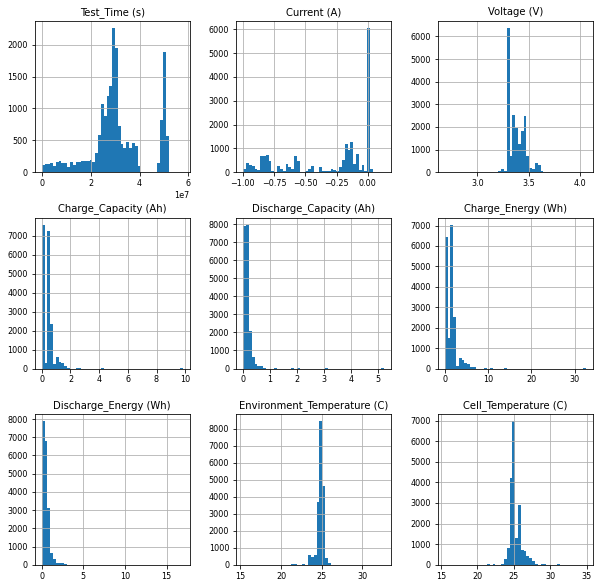

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

small_battery.hist(bins=50, figsize=(10, 10))
plt.show()